The Hamiltonian of a flux qubit (sometimes also called an RF SQUID) is given by
$$
H =  E_C \hat{N}^2 - E_0 \cos \hat{\delta} + E_L ( \hat{\delta}  - \delta_{ext})^2
$$
To understand the behaviour of the solutions, let us first plot the underlying dimensionless classical potential
$$
V(x) = - \cos (x+a) + (l+1) x^2
$$

In [1]:
# Some imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from prettytable import PrettyTable

In [2]:
###########################################################
# Potential for a flux qubit                              #
# E0 - characteristic energy of Josephson junction        #
# El - characteristic energy of inductance                #
# a - flux bias                                           #
###########################################################
def U(l, a, x):
    return - np.cos(x+a) + (l+1)*x**2


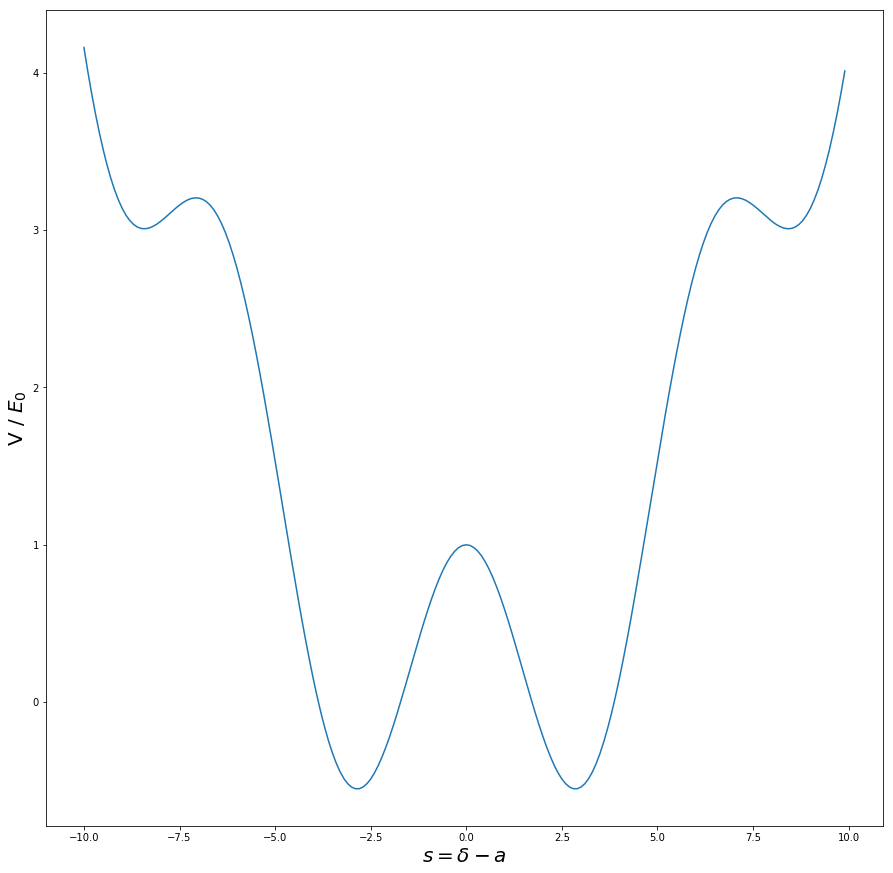

In [3]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
R = np.arange(-10,10,0.1) 
l = -0.95
ax.plot(R,U(l = l, a = np.pi, x = R))
ax.set_ylabel("V / $E_0$",fontsize=20)
ax.set_xlabel("$s = \delta - a$", fontsize=20)
plt.show()

We now need to calculate a few integrals. First, we consider the integral
$$
I_k =  \int_{-\frac{L}{2}}^{\frac{L}{2}} \cos s \cos (\frac{k\pi}{L} (s + \frac{L}{2})) ds
$$
and calculate this for a few values of $k$.

In [4]:
#####################################
# Calculate Ik                      #
#####################################
def Ik(k, L):
    i = integrate.quad(lambda x: np.cos(x) * np.cos(k*np.pi / L * (x + 0.5*L) ) , -0.5*L, 0.5*L)[0]
    return i

#####################################
# Calculate Jk                      #
#####################################
def Jk(k, L):
    j = integrate.quad(lambda x: x**2 * np.cos(k*np.pi / L * (x + 0.5*L) ) , -0.5*L, 0.5*L)[0]
    return j



We can now calculate the matrix elements of the Hamiltonian using the formulas
$$
\langle n | \cos s | m \rangle = \frac{1}{L} (I_{n-m} - I_{n+m})
$$
and
$$
\langle n | - \nabla^2  | m \rangle = \frac{n^2 \pi^2}{L^2} \delta_{nm}
$$
$$
\langle n | s^2 | m \rangle = \frac{1}{L} (J_{n-m} - J_{n+m})
$$
We operate the flux qubit in the range $E_C << E_0$, i.e. in a range where the phase will oscillate only slightly - we expect oscillations around the classical minima of the potential

In [5]:
prec = 40
L = 40
H = np.zeros((prec, prec))
Ec = 0.01
E0 = 1


In [6]:
for n in np.arange(1, prec+1, 1):
    for m in np.arange(1, prec+1, 1):
        h = E0 / L * (Ik(n-m, L) - Ik(n+m, L))
        h = h + E0 / L*(l+1)*0.5 * (Jk(n-m, L) - Jk(n+m, L))
        if (n == m):
            h = h + Ec * n**2 *np.pi**2 / L**2 
        H[n-1,m-1] = h

In [7]:
# Now compute eigenvalues and eigenvectors and sort them
E, v = np.linalg.eig(H)
s = np.argsort(E)
print ("Lowest eigenvalues: ", E[s[0]], E[s[1]])
print ("Energy gap: ", E[s[1]] -  E[s[0]])
print ("Next eigenvalue: ", E[s[2]])

Lowest eigenvalues:  -0.654117028114 -0.641692105085
Energy gap:  0.0124249230283
Next eigenvalue:  -0.370243861465


In [8]:
########################################
# Given E and v, we can now calculate  #
# the wave function psi(s)             #
########################################
def psi(n,E,v,L,s):
    o = np.argsort(E)
    result = 0
    R = np.arange(1, prec+1, 1) 
    if abs(s) < 0.5*L:
        for r in R:
            result = result + v[r-1, o[n]] *np.sin(r*np.pi/L*(s + 0.5*L))
    return result

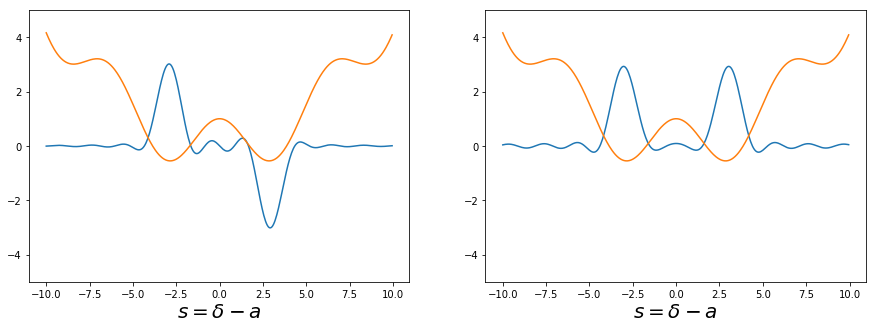

In [9]:
fig = plt.figure(figsize=(15,5))
axg = fig.add_subplot(1,2,1)
axe = fig.add_subplot(1,2,2)
R = np.arange(-10, 10, 0.05) 
g = []
e = []
for r in R:
    g.append(psi(0, E, v, L, r))
    e.append(psi(1, E, v, L, r))  
                   
axg.plot(R, g)
axg.plot(R,U(l = l, a = np.pi, x = R))
axg.set_xlabel("$s = \delta - a$", fontsize=20)
axg.set_ylim(-5, 5)

axe.plot(R, e)
axe.plot(R,U(l = l, a = np.pi, x = R))
axe.set_xlabel("$s = \delta - a$", fontsize=20)
axe.set_ylim(-5, 5)
plt.show()

Finally, let us find the minima of the classical potential
$$
V(x) =  \cos (x) + (l+1) x^2
$$

In [10]:
import scipy.optimize as optimize
optimize.minimize(lambda x :  np.cos(x) + (l+1)*x**2, x0 = -2.5, bounds = [(2, 3)])

      fun: array([-0.55166514])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -5.67323966e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 10
      nit: 4
   status: 0
  success: True
        x: array([ 2.85233653])

In [11]:
np.sin(2.8 + np.pi)

-0.33498815015590522